In [58]:
# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [59]:
# loading dataset
train = pd.read_csv('train/train.csv')
test = pd.read_csv('test/test.csv')
train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [60]:
# loading training images
train_img = []
i=0
for img_name in tqdm(train['id']):
    if(i==16000):
        break
    i+=1
    # defining the image path
    image_path = 'train/train/' + str(img_name) + '.png'
    # reading the image
    img = imread(image_path, as_gray=True)
    # normalizing the pixel values
    img /= 255.0
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)

# converting the list to numpy array
train_x = np.array(train_img)
# defining the target
train_y = train['label'].values
# train_x=train_x[:16000]
train_y=train_y[:16000]
train_x.shape



  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 171/60000 [00:00<00:35, 1703.77it/s]

  1%|          | 364/60000 [00:00<00:33, 1763.81it/s]

  1%|          | 560/60000 [00:00<00:32, 1816.06it/s]

  1%|▏         | 759/60000 [00:00<00:31, 1862.72it/s]

  2%|▏         | 970/60000 [00:00<00:30, 1927.18it/s]

  2%|▏         | 1171/60000 [00:00<00:30, 1950.74it/s]

  2%|▏         | 1371/60000 [00:00<00:29, 1964.78it/s]

  3%|▎         | 1555/60000 [00:00<00:32, 1800.63it/s]

  3%|▎         | 1729/60000 [00:00<00:37, 1567.10it/s]

  3%|▎         | 1887/60000 [00:01<00:38, 1509.51it/s]

  3%|▎         | 2091/60000 [00:01<00:35, 1636.24it/s]

  4%|▍         | 2291/60000 [00:01<00:33, 1727.79it/s]

  4%|▍         | 2506/60000 [00:01<00:31, 1833.13it/s]

  4%|▍         | 2694/60000 [00:01<00:31, 1823.24it/s]

  5%|▍         | 2902/60000 [00:01<00:30, 1892.65it/s]

  5%|▌         | 3095/60000 [00:01<00:30, 1859.25it/s]

  5%|▌         | 3284/60000 [00:01<00:35, 1611.55it/s]

  6%|▌  

(16000, 28, 28)



 27%|██▋       | 15993/60000 [00:23<00:22, 1943.70it/s]

(<matplotlib.axes._subplots.AxesSubplot at 0x7f70bf8766a0>,
 <matplotlib.image.AxesImage at 0x7f70bf85d400>)

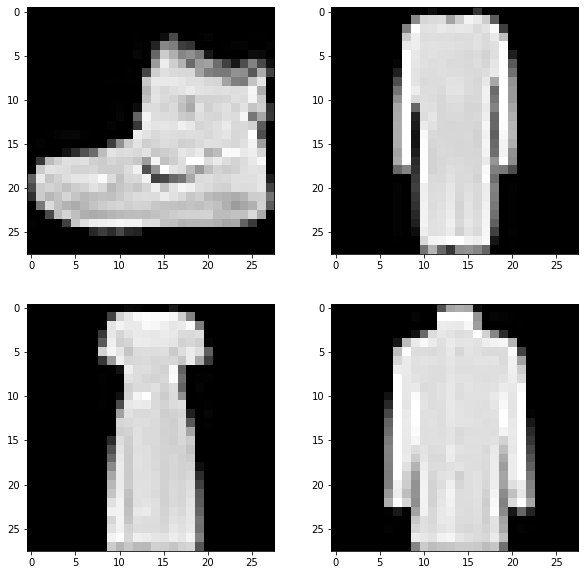

In [61]:
# visualizing images
i = 0
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(train_x[i], cmap='gray')
plt.subplot(222), plt.imshow(train_x[i+25], cmap='gray')
plt.subplot(223), plt.imshow(train_x[i+50], cmap='gray')
plt.subplot(224), plt.imshow(train_x[i+75], cmap='gray')

In [62]:
# create validation set
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

(((14400, 28, 28), (14400,)), ((1600, 28, 28), (1600,)))

In [64]:
# converting training images into torch format
train_x = train_x.reshape(14400, 1, 28, 28)
train_x  = torch.from_numpy(train_x)

# converting the target into torch format
train_y = train_y.astype(int)
train_y = torch.from_numpy(train_y)

# shape of training data
train_x.shape, train_y.shape

(torch.Size([14400, 1, 28, 28]), torch.Size([14400]))

In [65]:
# converting validation images into torch format
val_x = val_x.reshape(1600, 1, 28, 28)
val_x  = torch.from_numpy(val_x)

# converting the target into torch format
val_y = val_y.astype(int)
val_y = torch.from_numpy(val_y)

# shape of validation data
val_x.shape, val_y.shape

(torch.Size([1600, 1, 28, 28]), torch.Size([1600]))

In [66]:

class PrintLayer(Module): 
    comment = ""
    def __init__(self,c):
        self.comment = c
        super(PrintLayer, self).__init__() 
    def forward(self, x): 
        # Do your print / debug stuff here 
        print(self.comment,x.shape) 
        return x

In [67]:
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            PrintLayer("after conv1"),
            MaxPool2d(kernel_size=2, stride=2),
            PrintLayer("after maxpool1"),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            PrintLayer("after conv2"),
            MaxPool2d(kernel_size=2, stride=2),
            PrintLayer("after maxpool2"),
#             # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
#             MaxPool2d(kernel_size=2, stride=2),
#             # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
#             MaxPool2d(kernel_size=2, stride=2),
#             # Defining another 2D convolution layer
#             Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
#             BatchNorm2d(4),
#             ReLU(inplace=True),
#             MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(4 * 7 * 7, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
#         print('1 ',x.shape)
        x = self.cnn_layers(x)
#         print('2 ',x.shape)
        x = x.view(x.size(0), -1)
#         print('3 ',x.shape)
        x = self.linear_layers(x)
#         print('4 ',x.shape)
        return x

In [68]:
# defining the model
model = Net()
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): PrintLayer()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): PrintLayer()
    (6): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): PrintLayer()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): PrintLayer()
    (12): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True)
    (15): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, tr

In [69]:
def train(epoch):
    model.train()
    tr_loss = 0
    # getting the training set
    x_train, y_train = Variable(train_x), Variable(train_y)
    # getting the validation set
    x_val, y_val = Variable(val_x), Variable(val_y)
    # converting the data into GPU format
    if torch.cuda.is_available():
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        x_val = x_val.cuda()
        y_val = y_val.cuda()

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train)
    output_val = model(x_val)

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    train_losses.append(loss_train)
    val_losses.append(loss_val)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%2 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

In [70]:
# defining the number of epochs
n_epochs = 25
# empty list to store training losses
train_losses = []
# empty list to store validation losses
val_losses = []
# training the model
for epoch in range(n_epochs):
    train(epoch)

after conv1 torch.Size([14400, 4, 28, 28])
after maxpool1 torch.Size([14400, 4, 14, 14])
after conv2 torch.Size([14400, 4, 14, 14])
after maxpool2 torch.Size([14400, 4, 7, 7])
after conv1 torch.Size([1600, 4, 28, 28])
after maxpool1 torch.Size([1600, 4, 14, 14])
after conv2 torch.Size([1600, 4, 14, 14])
after maxpool2 torch.Size([1600, 4, 7, 7])
Epoch :  1 	 loss : tensor(2.3867, grad_fn=<NllLossBackward>)
after conv1 torch.Size([14400, 4, 28, 28])
after maxpool1 torch.Size([14400, 4, 14, 14])
after conv2 torch.Size([14400, 4, 14, 14])
after maxpool2 torch.Size([14400, 4, 7, 7])
after conv1 torch.Size([1600, 4, 28, 28])
after maxpool1 torch.Size([1600, 4, 14, 14])
after conv2 torch.Size([1600, 4, 14, 14])
after maxpool2 torch.Size([1600, 4, 7, 7])
after conv1 torch.Size([14400, 4, 28, 28])
after maxpool1 torch.Size([14400, 4, 14, 14])
after conv2 torch.Size([14400, 4, 14, 14])
after maxpool2 torch.Size([14400, 4, 7, 7])
after conv1 torch.Size([1600, 4, 28, 28])
after maxpool1 torch.Siz

after maxpool2 torch.Size([1600, 4, 7, 7])
after conv1 torch.Size([14400, 4, 28, 28])
after maxpool1 torch.Size([14400, 4, 14, 14])
after conv2 torch.Size([14400, 4, 14, 14])
after maxpool2 torch.Size([14400, 4, 7, 7])
after conv1 torch.Size([1600, 4, 28, 28])
after maxpool1 torch.Size([1600, 4, 14, 14])
after conv2 torch.Size([1600, 4, 14, 14])
after maxpool2 torch.Size([1600, 4, 7, 7])
Epoch :  23 	 loss : tensor(0.8113, grad_fn=<NllLossBackward>)
after conv1 torch.Size([14400, 4, 28, 28])
after maxpool1 torch.Size([14400, 4, 14, 14])
after conv2 torch.Size([14400, 4, 14, 14])
after maxpool2 torch.Size([14400, 4, 7, 7])
after conv1 torch.Size([1600, 4, 28, 28])
after maxpool1 torch.Size([1600, 4, 14, 14])
after conv2 torch.Size([1600, 4, 14, 14])
after maxpool2 torch.Size([1600, 4, 7, 7])
after conv1 torch.Size([14400, 4, 28, 28])
after maxpool1 torch.Size([14400, 4, 14, 14])
after conv2 torch.Size([14400, 4, 14, 14])
after maxpool2 torch.Size([14400, 4, 7, 7])
after conv1 torch.Size

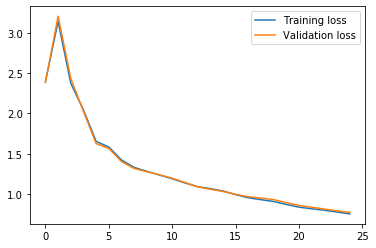

In [71]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [73]:
# prediction for training set
with torch.no_grad():
    output = model(train_x)
    
softmax = torch.exp(output)
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on training set
accuracy_score(train_y, predictions)

after conv1 torch.Size([14400, 4, 28, 28])
after maxpool1 torch.Size([14400, 4, 14, 14])
after conv2 torch.Size([14400, 4, 14, 14])
after maxpool2 torch.Size([14400, 4, 7, 7])


0.7373611111111111

In [74]:
# prediction for validation set
with torch.no_grad():
    output = model(val_x)

softmax = torch.exp(output)
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on validation set
accuracy_score(val_y, predictions)

after conv1 torch.Size([1600, 4, 28, 28])
after maxpool1 torch.Size([1600, 4, 14, 14])
after conv2 torch.Size([1600, 4, 14, 14])
after maxpool2 torch.Size([1600, 4, 7, 7])


0.725625

In [76]:
# loading test images
test_img = []
for img_name in tqdm(test['id']):
    # defining the image path
    image_path = 'test/test/' + str(img_name) + '.png'
    # reading the image
    img = imread(image_path, as_gray=True)
    # normalizing the pixel values
    img /= 255.0
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    test_img.append(img)

# converting the list to numpy array
test_x = np.array(test_img)
test_x.shape




  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 1/10000 [00:00<1:18:41,  2.12it/s]


  0%|          | 4/10000 [00:00<57:07,  2.92it/s]  


  0%|          | 7/10000 [00:00<41:48,  3.98it/s]


  0%|          | 16/10000 [00:00<29:49,  5.58it/s]


  0%|          | 25/10000 [00:00<21:25,  7.76it/s]


  0%|          | 40/10000 [00:01<15:19, 10.83it/s]


  1%|          | 53/10000 [00:01<11:15, 14.73it/s]


  1%|          | 63/10000 [00:01<08:24, 19.70it/s]


  1%|          | 99/10000 [00:01<06:00, 27.47it/s]


  1%|          | 116/10000 [00:01<04:32, 36.29it/s]


  1%|▏         | 132/10000 [00:01<03:48, 43.13it/s]


  1%|▏         | 146/10000 [00:01<03:12, 51.30it/s]


  2%|▏         | 159/10000 [00:02<04:15, 38.49it/s]


  2%|▏         | 169/10000 [00:02<03:48, 43.03it/s]


  2%|▏         | 188/10000 [00:02<02:55, 55.98it/s]


  2%|▏         | 219/10000 [00:02<02:11, 74.20it/s]


  2%|▏         | 244/10000 [00:02<01:44, 93.80it/s]


  3%|▎         | 308/10000 [00:02<01:16, 12

(10000, 28, 28)

In [77]:
# converting training images into torch format
test_x = test_x.reshape(10000, 1, 28, 28)
test_x  = torch.from_numpy(test_x)
test_x.shape

torch.Size([10000, 1, 28, 28])

In [79]:
# generating predictions for test set
with torch.no_grad():
    output = model(test_x)

softmax = torch.exp(output)
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

after conv1 torch.Size([10000, 4, 28, 28])
after maxpool1 torch.Size([10000, 4, 14, 14])
after conv2 torch.Size([10000, 4, 14, 14])
after maxpool2 torch.Size([10000, 4, 7, 7])
